# Jamie's Phase 1 Project Work!
### hooray 

### also side note... highly recommend using command+F to navigate this sucker

In [ ]:
# imports
import pandas as pd

### CPI package sourced from https://github.com/datadesk/cpi#:~:text=Working%20with%20Python,the%20Bureau%20of%20Labor%20Statistics

In [ ]:
import cpi
cpi.update() # run to make sure current Consumer Price Index is being used in calculations

In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
bomMovieGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [261]:
imdbNameBasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [159]:
rtMovieInfo = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [106]:
# kaggle_movies = pd.read_csv('movies_metadata.csv', dtype={'genres':list}) == not working

In [35]:
# Kaggle columns
import ast
# kaggle_movies['genres'] = kaggle_movies['genres'].apply(lambda x: ast.literal_eval(x))
# kaggle_movies['genres']



In [7]:
# get list of all columns in files
allFiles = [bomMovieGross, imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,
           rtMovieInfo, rtReviews, tmdbMovies, tnMovieBudgets]

allCols = list(map(lambda x: x.columns, allFiles))
allCols

[Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 Index(['nconst', 'primary_name', 'birth_year', 'death_year',
        'primary_profession', 'known_for_titles'],
       dtype='object'),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'),
 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
        'attributes', 'is_original_title'],
       dtype='object'),
 Index(['tconst', 'directors', 'writers'], dtype='object'),
 Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object'),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'origin

# Cleaning tnMovieBudgets

In [160]:
tnMovieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [161]:
# looking for more efficient way to do this
tnMovieBudgets['worldwide_gross'] = tnMovieBudgets['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['domestic_gross'] = tnMovieBudgets['domestic_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['production_budget'] = tnMovieBudgets['production_budget'].apply(lambda x: int(x.replace('$','').replace(',','')))
# tnMovieBudgets[tnMovieBudgets['worldwide_gross']=='$0'] = 'None'
# try applymap

# don't have to run again, but why??

In [162]:
tnMovieBudgets['release_date'] = pd.to_datetime(tnMovieBudgets['release_date'], errors='coerce') # what does coerce do?
tnMovieBudgets['release_date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [ ]:
# adding 'month_released' and year released column
tnMovieBudgets['month_released'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['month_released'] = tnMovieBudgets['month_released'].apply(lambda x: int(x[5:7]))

tnMovieBudgets['year'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['year'] = tnMovieBudgets['year'].apply(lambda x: int(x[:4]))

#oopsie gotta drop some stuff
tnMovieBudgets.drop(labels='year_released', axis=1, inplace=True)

In [180]:
tnMovieBudgets.drop(labels='release_date', axis=1, inplace=True)

In [181]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year
0,1,Avatar,425000000,760507625,2776345279,12,2009
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017


# Cleaning bomMovieGross

In [164]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [165]:
bomMovieGross['foreign_gross'].fillna(value=0, inplace=True)

In [166]:
bomMovieGross['foreign_gross'] = bomMovieGross['foreign_gross'].apply(lambda x: float(str(x).replace(',','')))


# Adjusting all money values for inflation using CPI package

In [186]:
# bomMovieGross

bomMovieGross['domestic_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

bomMovieGross['foreign_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.foreign_gross, x.year), axis=1)

In [187]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_adj,foreign_adj
0,Toy Story 3,BV,415000000.0,652000000.0,2010,4.779020e+08,7.508244e+08
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,3.848551e+08,7.960811e+08
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,3.408651e+08,7.649887e+08
3,Inception,WB,292600000.0,535700000.0,2010,3.369497e+08,6.168967e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,2.748800e+08,5.917924e+08


In [192]:
bomMovieGross['year'].dtype

dtype('int64')

In [195]:
cpi.get(2018)

251.107

In [197]:
# tnMovieBudgets
tnMovieYA = tnMovieBudgets[tnMovieBudgets['year']<2019]

tnMovieBudgets['domestic_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

tnMovieBudgets['worldwide_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.worldwide_gross, x.year), axis=1)


In [198]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year,domestic_adj,worldwide_adj
0,1,Avatar,425000000,760507625,2776345279,12,2009,8.901438e+08,3.249601e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,2.691077e+08,1.167310e+09
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019,NaN,NaN
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,4.862925e+08,1.486419e+09
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,6.353292e+08,1.348882e+09


In [200]:
# Fill domestic/worldwide adjusted NaNs with original price-- the CPI adjuster does not adjust
# for any years after 2018.

tnMovieBudgets['domestic_adj'].fillna(value=tnMovieBudgets['domestic_gross'], inplace=True)


,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year,domestic_adj,worldwide_adj
0,1,Avatar,425000000,760507625,2776345279,12,2009,8.901438e+08,3.249601e+09
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,2.691077e+08,1.167310e+09
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019,4.276235e+07,NaN
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,4.862925e+08,1.486419e+09
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,6.353292e+08,1.348882e+09


In [201]:
tnMovieBudgets['worldwide_adj'].fillna(value=tnMovieBudgets['worldwide_gross'], inplace=True)

# Cleaning tmdbMovies

In [8]:
tmdbMovies.drop('Unnamed: 0', axis=1, inplace=True)
# don't run again

In [13]:
#CHECK IF THERE ARE DUPLICATE MOVIES DUDE
tmdbMovies['id'].value_counts()

292086    3
463839    3
11976     3
391872    3
416572    3
         ..
356987    1
350846    1
479871    1
500353    1
524288    1
Name: id, Length: 25497, dtype: int64

# Cleaning IMDB Data

In [ ]:
imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,

In [116]:
imdbNameBasics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [ ]:
# Split primary_profession and known_for_titles lists
imdbNameBasics.fillna(value='None', inplace=True)
imdbNameBasics[['known_for_titles','primary_profession']] = imdbNameBasics[['known_for_titles','primary_profession']].applymap(lambda x: x.split(','))

In [224]:
imdbNameBasics['known_for_titles'][0]

['tt0837562', 'tt2398241', 'tt0844471', 'tt0118553']

In [108]:
imdbTitleBasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [228]:
imdbTitleBasics['primary_title'].value_counts()

Home                                 24
Broken                               20
The Return                           20
Alone                                16
Homecoming                           16
                                     ..
A Queer Country                       1
The Humpback Whales of Cape Verde     1
Caur Adatu                            1
Thawathosamat                         1
Burra katha                           1
Name: primary_title, Length: 136071, dtype: int64

In [238]:
# may use to create list of all possible titles when joining certain dataframes...
imdbTitleBasics['title_equal'] = (imdbTitleBasics['original_title'] == imdbTitleBasics['primary_title'])

imdbTitleBasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[action, crime, drama]",True
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[biography, drama]",False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[drama],True
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[comedy, drama]",True
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[comedy, drama, fantasy]",False


In [237]:
imdbTitleBasics['title_equal'].value_counts()

True     131640
False     14504
Name: title_equal, dtype: int64

In [231]:
imdbTitleBasics['genres'].fillna(value='None', inplace=True)
# already ran

In [232]:
# Split list of genres
imdbTitleBasics['genres'] = imdbTitleBasics['genres'].apply(lambda x: x.lower().split(','))

In [216]:
imdb_orig_titles = imdbTitleAkas[imdbTitleAkas['is_original_title']==1.0]

In [239]:
imdbTitleAkas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [281]:
# rename title_id to tconst to allow for appending
imdbTitleAkas.rename(mapper={'title_id' : 'tconst'}, axis=1, inplace=True)

#already ran

In [282]:
imdbTitleAkas.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [227]:
imdbTitleAkas['region'].value_counts()

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
       ...  
VC         1
AI         1
EH         1
KN         1
TM         1
Name: region, Length: 213, dtype: int64

In [110]:
imdbTitleCrew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [111]:
imdbTitlePrincipals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [112]:
imdbTitleRatings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Time to smush these Data frames together along the **tconst** column:

In [277]:
imdb_dfs = [imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings]

In [278]:
len(imdb_dfs)

5

In [285]:
# maybe clean this up later with a for loop?
imdb_master = pd.merge(
                    pd.merge(
                            pd.merge(
                                    pd.merge(
                                        imdb_dfs[0], imdb_dfs[1], on='tconst', how = 'outer'
                                        ), 
                                imdb_dfs[2], on='tconst', how = 'outer'
                                ), 
                        imdb_dfs[3], on='tconst', how = 'outer', suffixes=('_akas', '_princ')
                        ),
                  imdb_dfs[4], on='tconst', how = 'outer')

In [292]:
imdb_master[20:35]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,ordering_akas,title,region,language,...,is_original_title,directors,writers,ordering_princ,nconst,category,job,characters,averagerating,numvotes
20,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,composer,NaN,NaN,7.0,77.0
21,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1.0,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",7.0,77.0
22,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2.0,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",7.0,77.0
23,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",3.0,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]",7.0,77.0
24,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",4.0,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]",7.0,77.0
25,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",5.0,nm0712540,director,NaN,NaN,7.0,77.0
26,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",6.0,nm0023551,writer,dialogue,NaN,7.0,77.0
27,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,nm1194313,writer,story,NaN,7.0,77.0
28,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",8.0,nm0347899,writer,dialogue,NaN,7.0,77.0
29,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3.0,Sunghursh,IN,NaN,...,0.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",9.0,nm1391276,writer,screenplay,NaN,7.0,77.0


### Grouping IMDB master

In [ ]:
# By movie title


# Graphs

Text(0, 0.5, 'Average Domestic Gross (Billions?)')

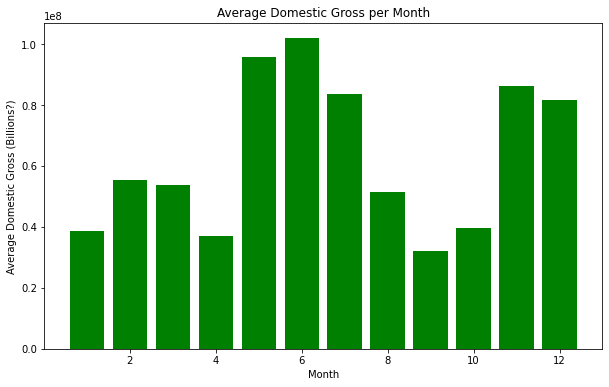

In [203]:
# comparing month released to mean DOMESTIC gross (using domestic_adj)
month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_dom_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['domestic_adj'].mean() for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses, color='green')   
ax.set_title('Average Domestic Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Billions?)')

In [88]:
# comparing mean gross without zeros
tnMovies_noz = tnMovieBudgets.replace(0, np.NaN)
tnMovies_noz

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month_released,year_released
0,1,2009-12-18,Avatar,425000000,760507625.0,2.776345e+09,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350.0,1.497624e+08,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,12,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,NaN,NaN,12,2018
5778,79,1999-04-02,Following,6000,48482.0,2.404950e+05,4,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338.0,1.338000e+03,7,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,NaN,NaN,9,2015


In [205]:
# month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovies_noz['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovies_noz['month_released'].value_counts().index))]
#mean_dom_grosses1 = [tnMovies_noz[tnMovies_noz['month_released']==i]['domestic_adj'].mean(skipna=True) for i in range(1,13)]                                                                                               
#ax.bar(x, mean_dom_grosses1, color='indigo')   
#ax.set_title('Average Domestic Gross per Month, without outliers')
#ax.set_xlabel('Month')
#ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

# ***this graph of means have the same values as the other, but why?***
# may want to convert months to their names

Text(0, 0.5, 'Average Worldwide Gross (Billions)')

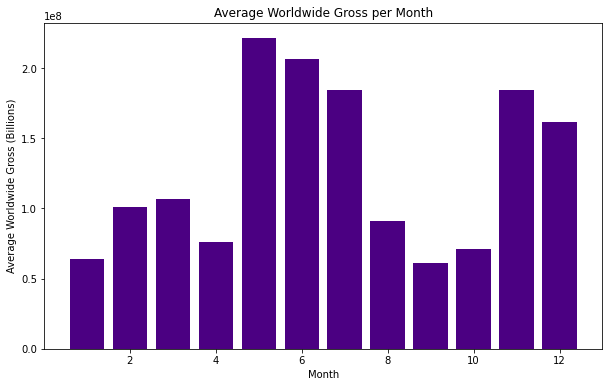

In [208]:
# comparing month released to mean WORLDWIDE gross
month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_ww_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['worldwide_adj'].mean() for i in range(1,13)]                                                                                               
ax.bar(months, mean_ww_grosses, color='indigo')   
ax.set_title('Average Worldwide Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Worldwide Gross (Billions)')

# change y labels to be clearer

Text(0, 0.5, 'Average Total Gross (Billions)')

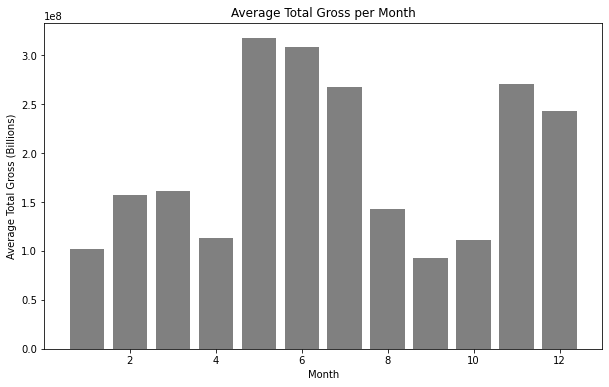

In [209]:
# comparing month released to mean WORLDWIDE + DOMESTIC

# create new column 'total gross'
tnMovieBudgets['total_gross'] = tnMovieBudgets['worldwide_adj'] + tnMovieBudgets['domestic_adj']

month_avg, ax = plt.subplots(figsize=(10,6))

# x and y values
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_total_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['total_gross'].mean() for i in range(1,13)]

# setting up the graph
ax.bar(months, mean_total_grosses, color='grey')   
ax.set_title('Average Total Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Gross (Billions)')

In [ ]:
# comparing month released to mean gross per genre



In [93]:
# comparing budget and net gross

Text(0, 0.5, 'Average Domestic Gross (Hundred Millions)')

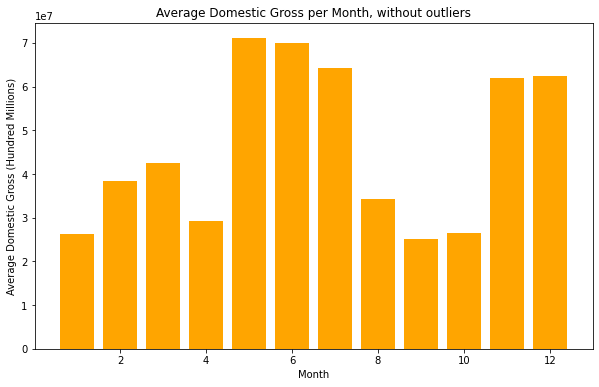

In [94]:
# stacked bar plot with month released domestic and foreign gross


month_avg, ax = plt.subplots(figsize=(10,6))
x = [sorted(tnMovies_noz['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovies_noz['month_released'].value_counts().index))]
mean_dom_grosses1 = [tnMovies_noz[tnMovies_noz['month_released']==i]['domestic_gross'].mean(skipna=True) for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses1, color='orange')   
ax.set_title('Average Domestic Gross per Month, without outliers')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

In [89]:
# Measure the highest differences between worldwide and domestic gross (international appeal)

In [ ]:
# Differences in STUDIO mean gross per year

In [ ]:
# percent of subscribers that watch new content provided by a streaming service

In [ ]:
# comparing streaming services with multiple figs